In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.pandas.read_csv("data/Duncan.csv", sep=',')
df

,name,type,income,education,prestige
0,accountant,prof,62,86,82
1,pilot,prof,72,76,83
2,architect,prof,75,92,90
3,author,prof,55,90,76
4,chemist,prof,64,86,90
5,minister,prof,21,84,87
6,professor,prof,64,93,93
7,dentist,prof,80,100,90
8,reporter,wc,67,87,52
9,engineer,prof,72,86,88


In [3]:
X_income = df['income'].values
X_education = df['education'].values
Y = df['prestige'].values

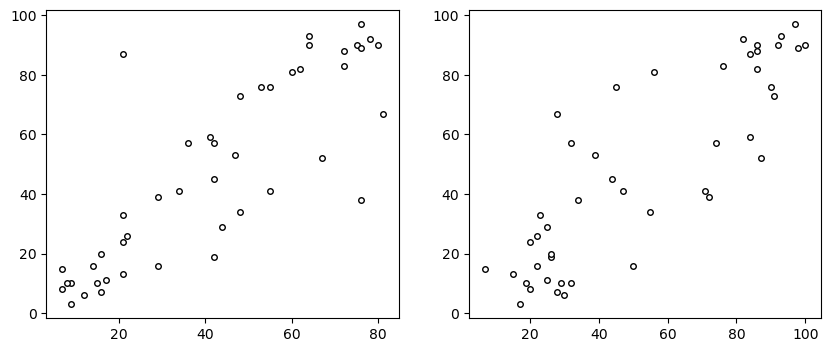

In [4]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(X_income, Y, s=16, c='w', edgecolors='k')
plt.subplot(1,2,2)
plt.scatter(X_education, Y, s=16, c='w', edgecolors='k')
plt.show()

In [5]:
from mltools.estimators import LinearLS
from mltools.scores import modified_zscore

In [6]:
X = X_income

In [7]:
regr_ls = LinearLS()
regr_ls.fit(X[:,None], Y)
mod_ls = regr_ls.model
print(np.asarray(mod_ls.param))

[2.45657433 1.08038968]


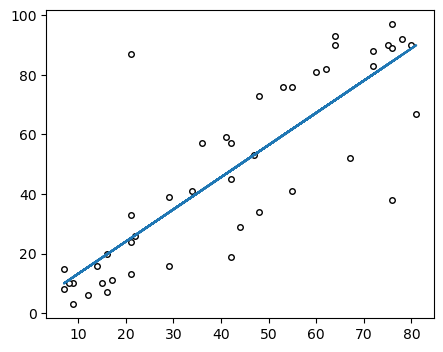

In [21]:
plt.figure(figsize=(5,4))
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.plot(X, mod_ls.evaluate(X_income[:,None]))
plt.show()

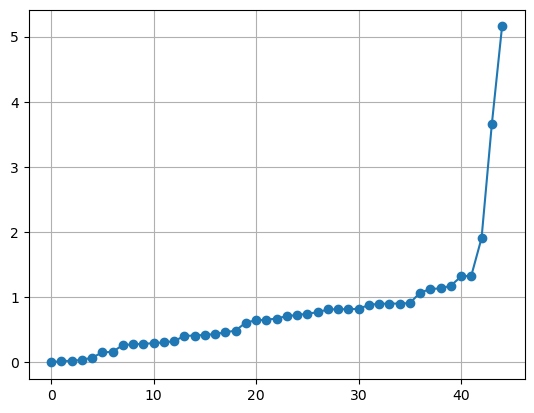

In [22]:
E = abs(Y - mod_ls.evaluate(X[:,None]))
Z = modified_zscore(E)
plt.plot(sorted(abs(Z)), marker='o')
plt.grid(1)
plt.show()

In [23]:
X1 = X[abs(Z) < 1.5]
Y1 = Y[abs(Z) < 1.5]

In [24]:
regr_ls1 = LinearLS()
regr_ls1.fit(X1[:,None], Y1)
mod_ls1 = regr_ls1.model
print(np.asarray(mod_ls1.param))

[-2.0860125   1.19748569]


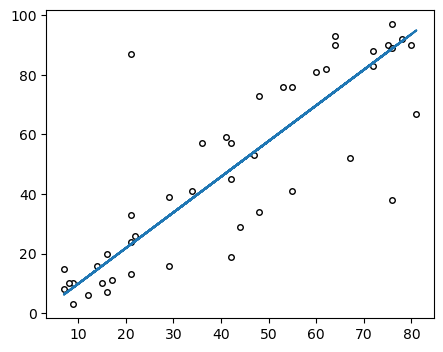

In [25]:
plt.figure(figsize=(5,4))
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.plot(X, mod_ls1.evaluate(X[:,None]))
plt.show()

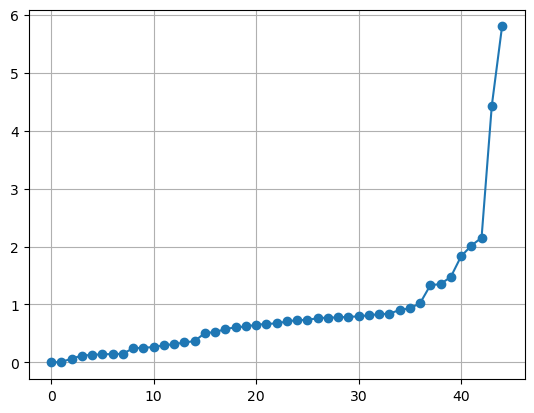

In [26]:
E1 = abs(Y - mod_ls1.evaluate(X[:,None]))
Z1 = modified_zscore(E1)
plt.plot(sorted(abs(Z1)), marker='o')
plt.grid(1)
plt.show()

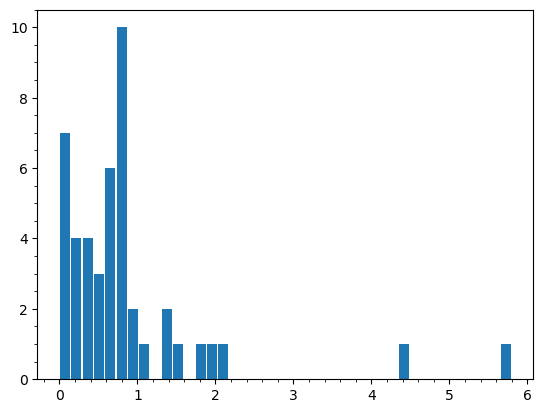

In [28]:
plt.hist(abs(Z1), bins=40, rwidth=0.9) #, density=True)
plt.minorticks_on()
plt.show()

In [29]:
X2 = X[abs(Z) < 1.2]
Y2 = Y[abs(Z) < 1.2]

In [30]:
regr_ls2 = LinearLS()
regr_ls2.fit(X2[:,None], Y2)
mod_ls2 = regr_ls2.model
print(np.asarray(mod_ls2.param))

[-4.04605986  1.2804273 ]


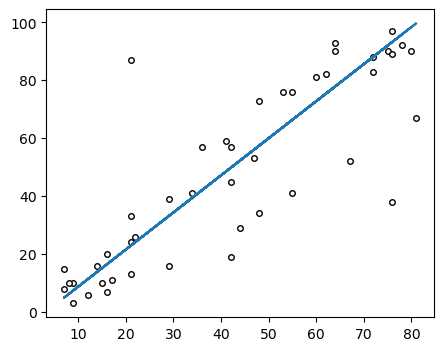

In [31]:
plt.figure(figsize=(5,4))
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.plot(X, mod_ls2.evaluate(X[:,None]))
plt.show()

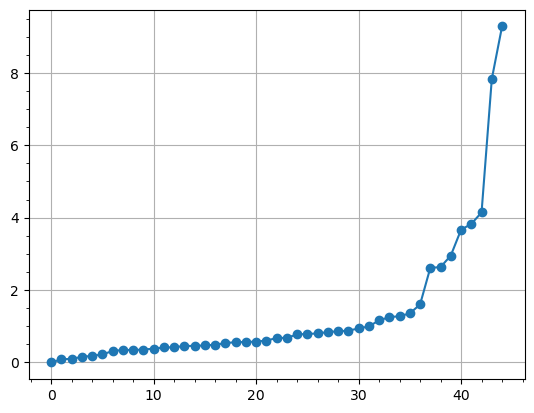

In [32]:
E2 = abs(Y - mod_ls2.evaluate(X[:,None]))
Z2 = modified_zscore(E2)
plt.plot(sorted(abs(Z2)), marker='o')
plt.grid(1)
plt.minorticks_on()
plt.show()

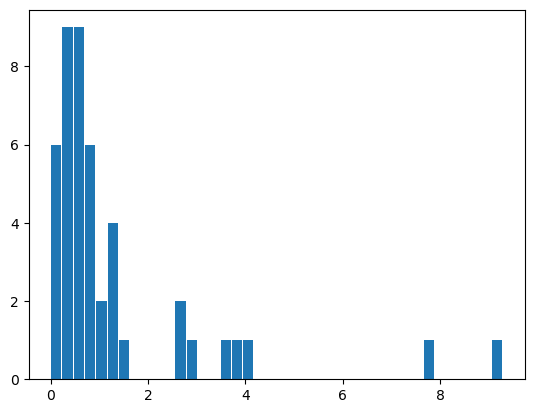

In [33]:
plt.hist(abs(Z2), bins=40, rwidth=0.9) #, density=True)
plt.show()

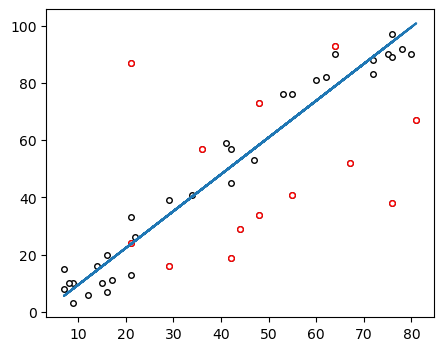

In [20]:
plt.figure(figsize=(5,4))
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.scatter(X[abs(Z2) > 1.1], Y[abs(Z2) > 1.1], s=16, c='w', edgecolors='r')
plt.plot(X, mod_ls2.evaluate(X[:,None]))
plt.show()